In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Spark table
df_spark = spark.table("madsc102.usaccidents_volume")

print("Spark rows:", df_spark.count())

# Convert to Pandas for visualization
df = df_spark.toPandas()
df.head()


Spark rows: 7061773


,ID,start_time,start_date,start_hour,duration_minutes,severity,city,state,latitude,longitude,distance_miles,is_weekend
0,3091597,2018-01-29 06:35:20,2018-01-29,6,2.528680e+07,3,Highland Park,MI,42.418091,-83.087936,0.0,False
1,3091598,2018-01-29 06:34:05,2018-01-29,6,2.528679e+07,2,Fenton,MI,42.863033,-83.739975,0.0,False
2,3091599,2018-01-29 06:37:06,2018-01-29,6,2.528680e+07,3,Grand Blanc,MI,42.895668,-83.632477,0.0,False
3,3091600,2018-01-29 06:43:04,2018-01-29,6,2.528680e+07,3,Grass Lake,MI,42.291252,-84.204346,0.0,False
4,3091601,2018-01-29 06:46:57,2018-01-29,6,2.528681e+07,2,Flint,MI,42.988998,-83.732826,0.0,False


In [0]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nMissing values:")
print(df.isna().mean().sort_values(ascending=False).head(20))


Shape: (7061773, 12)

Columns: ['ID', 'start_time', 'start_date', 'start_hour', 'duration_minutes', 'severity', 'city', 'state', 'latitude', 'longitude', 'distance_miles', 'is_weekend']

Missing values:
ID                  0.0
start_time          0.0
start_date          0.0
start_hour          0.0
duration_minutes    0.0
severity            0.0
city                0.0
state               0.0
latitude            0.0
longitude           0.0
distance_miles      0.0
is_weekend          0.0
dtype: float64


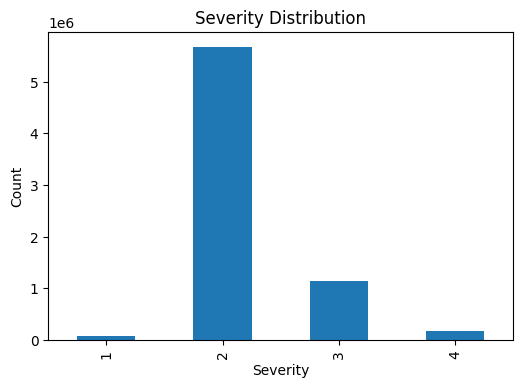

In [0]:
plt.figure(figsize=(6,4))
df['severity'].value_counts().sort_index().plot(kind='bar')
plt.title("Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


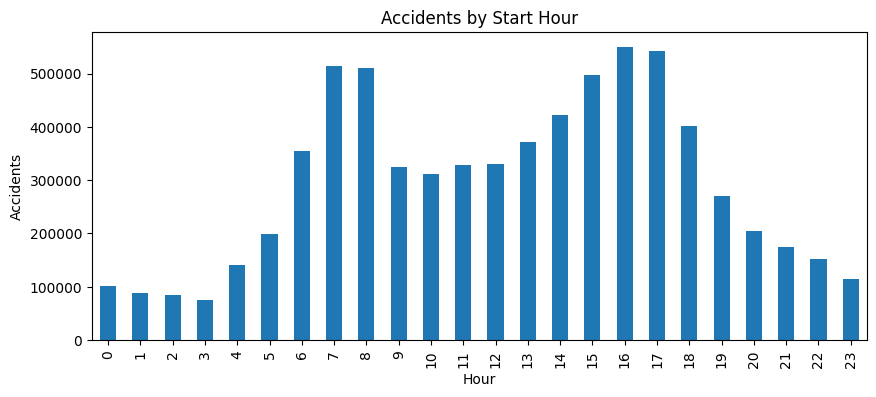

In [0]:
plt.figure(figsize=(10,4))
df['start_hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Accidents by Start Hour")
plt.xlabel("Hour")
plt.ylabel("Accidents")
plt.show()


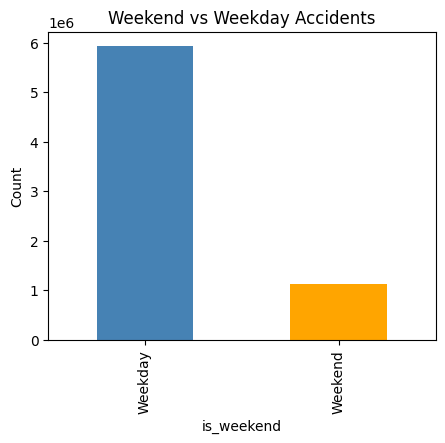

In [0]:
plt.figure(figsize=(5,4))
df['is_weekend'].value_counts().plot(
    kind='bar', 
    color=['steelblue', 'orange']
)
plt.title("Weekend vs Weekday Accidents")
plt.xticks([0,1], ['Weekday','Weekend'])
plt.ylabel("Count")
plt.show()


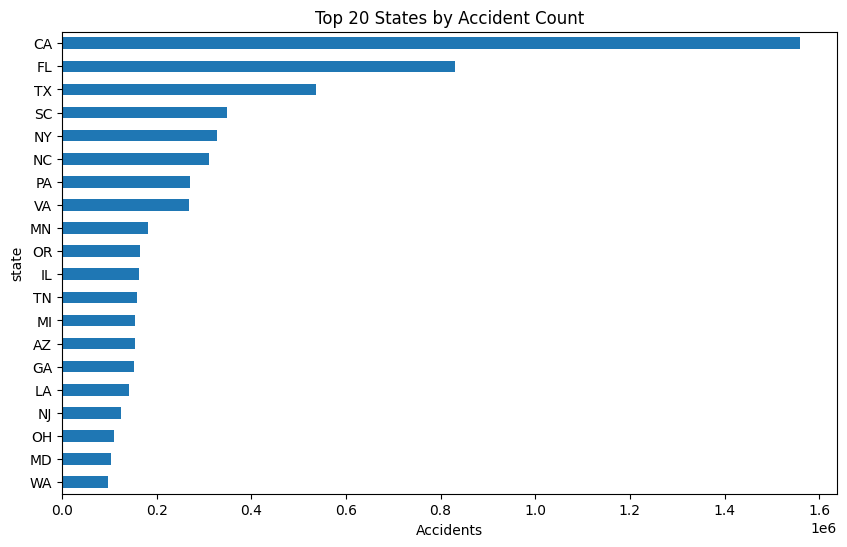

In [0]:
plt.figure(figsize=(10,6))
df['state'].value_counts().head(20).sort_values().plot(kind='barh')
plt.title("Top 20 States by Accident Count")
plt.xlabel("Accidents")
plt.show()


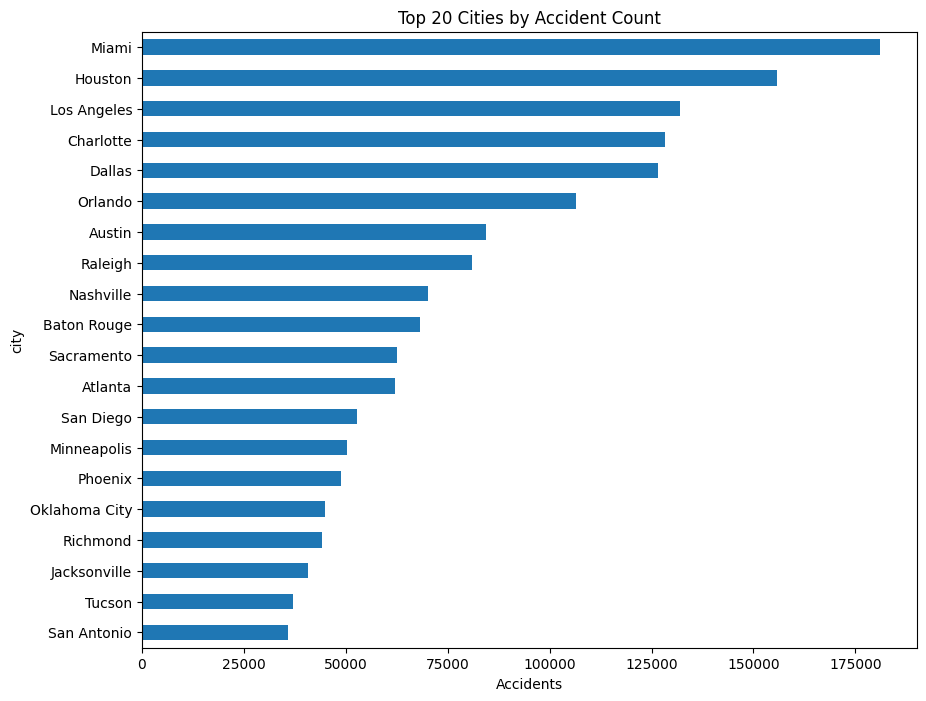

In [0]:
plt.figure(figsize=(10,8))
df['city'].value_counts().head(20).sort_values().plot(kind='barh')
plt.title("Top 20 Cities by Accident Count")
plt.xlabel("Accidents")
plt.show()


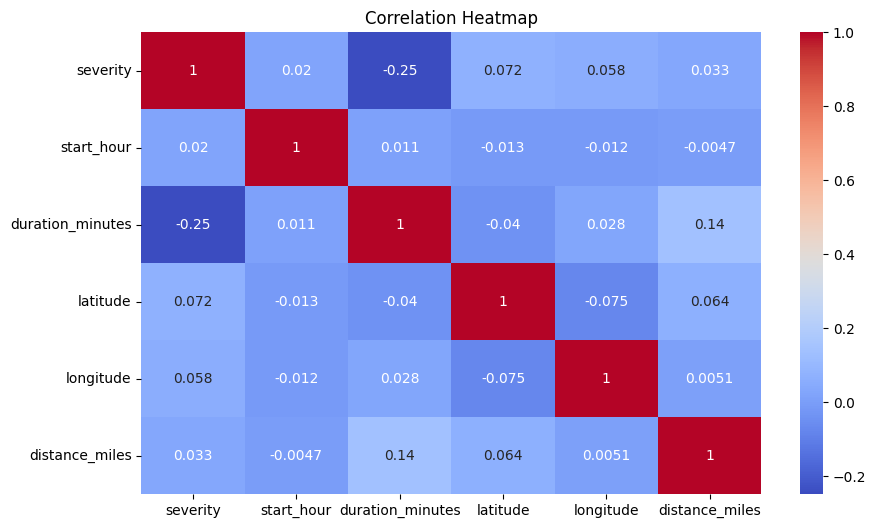

In [0]:
plt.figure(figsize=(10,6))
corr = df[['severity','start_hour','duration_minutes','latitude','longitude','distance_miles']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


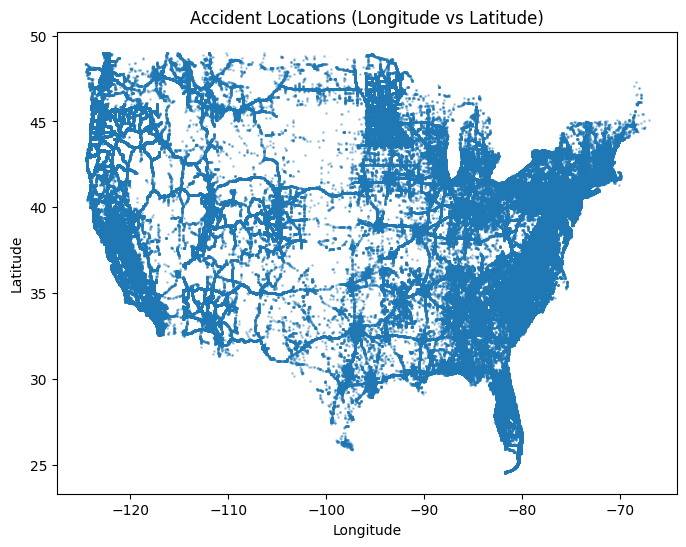

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'], s=1, alpha=0.3)
plt.title("Accident Locations (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


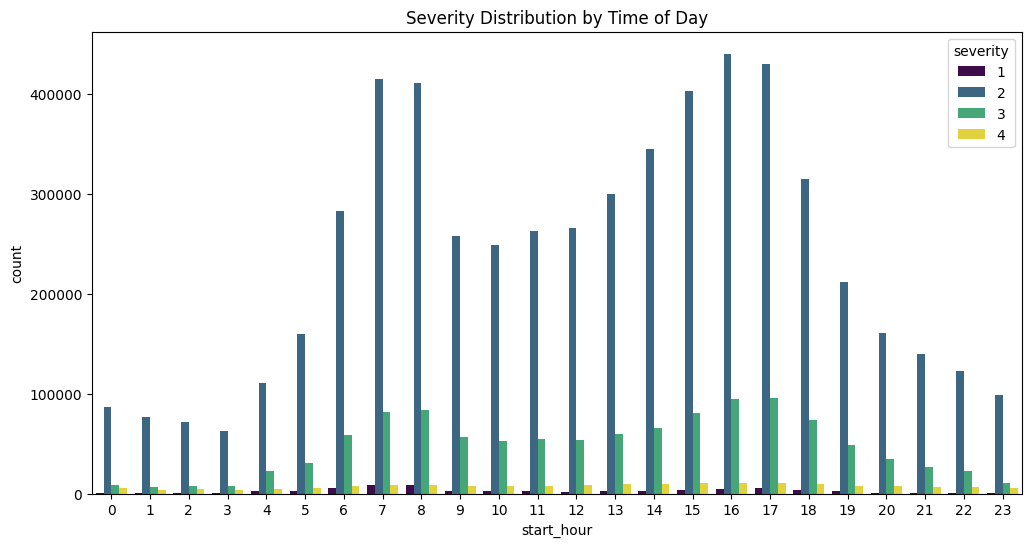

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='start_hour',
    hue='severity',
    palette='viridis'
)
plt.title("Severity Distribution by Time of Day")
plt.show()


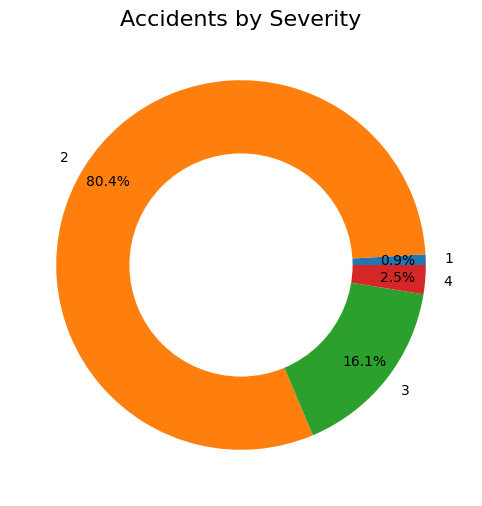

In [0]:
import matplotlib.pyplot as plt

# Calculate severity counts
severity_counts = df['severity'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

# Labels = severity levels (1,2,3,4)
labels = severity_counts.index

# Donut chart
ax.pie(
    severity_counts,
    labels=labels,
    autopct='%1.1f%%',
    pctdistance=0.85
)

# White circle for donut
centre_circle = plt.Circle((0,0), 0.60, color='white')
fig.gca().add_artist(centre_circle)

ax.set_title("Accidents by Severity", fontsize=16)

plt.show()


In [0]:
import matplotlib.pyplot as plt

# Drop missing coordinates if needed
df_USA = df.copy()
plt.figure(figsize=(10, 6))

plt.scatter(
    final_df['longitude'],
    final_df['latitude'],
    s=1, alpha=0.3
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Locations Across USA")
plt.show()


<Figure size 1000x600 with 0 Axes>

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-7060276983859199>, line 8
      4 df_USA = df.copy()
      5 plt.figure(figsize=(10, 6))
      7 plt.scatter(
----> 8     final_df['longitude'],
      9     final_df['latitude'],
     10     s=1, alpha=0.3
     11 )
     13 plt.xlabel("Longitude")
     14 plt.ylabel("Latitude")

NameError: name 'final_df' is not defined

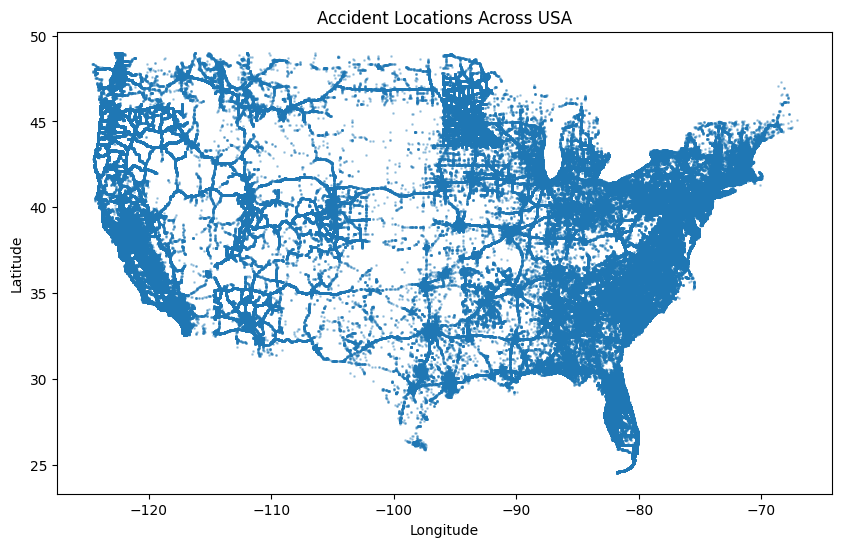

In [0]:
final_df = spark.table("madsc102.usaccidents_volume").toPandas()
['ID', 'start_time', 'start_date', 'start_hour', 'duration_minutes',
 'severity', 'city', 'state', 'latitude', 'longitude', 'distance_miles', 
 'is_weekend']
plt.figure(figsize=(10, 6))

plt.scatter(
    final_df['longitude'],
    final_df['latitude'],
    s=1, alpha=0.3
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Locations Across USA")
plt.show()



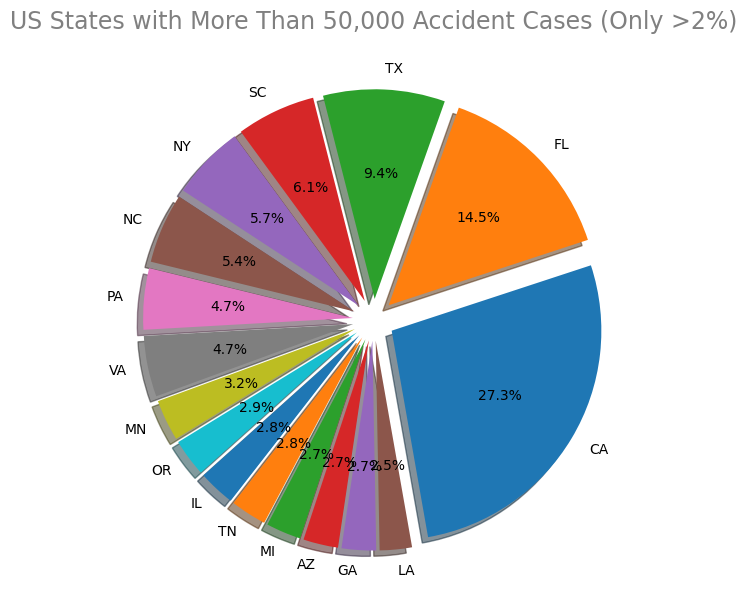

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Use the correct column name
b = df_USA['state'].value_counts()

# Filter states with more than 50,000 accident cases
top_states = b[b > 50000]

# Calculate percentage contribution
percentages = top_states / top_states.sum() * 100

# Keep only states with more than 2%
top_states_filtered = top_states[percentages > 2]

plt.figure(figsize=(10, 6))
plt.title("US States with More Than 50,000 Accident Cases (Only >2%)",
          size=17, y=1.04, color="grey")

# Dynamic explode for visibility
explode = np.ones(len(top_states_filtered)) * 0.1

# Pie chart
plt.pie(
    top_states_filtered,
    labels=top_states_filtered.index,
    autopct="%1.1f%%",
    startangle=280,
    shadow=True,
    explode=explode,
    textprops={'fontsize': 10, 'color': 'black'}
)

plt.tight_layout()
plt.show()
